<a href="https://colab.research.google.com/github/HowardHNguyen/Machine-Learning-Deep-Learning/blob/main/Unsupervised_Machine_Learning_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING / UNSUPERVISED LEARNING / CLUSTERING**

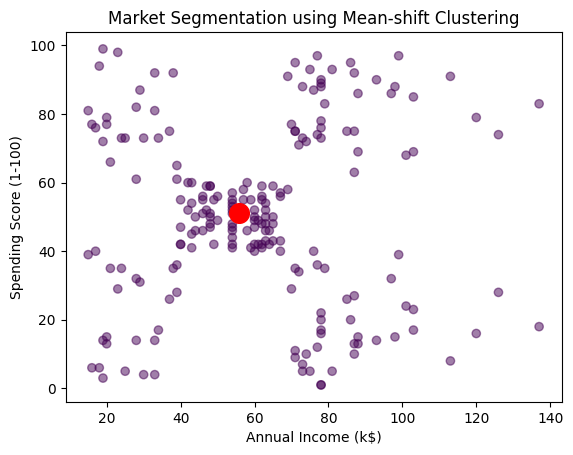

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/data/Mall_Customers.csv')

# Extract relevant features for clustering (e.g., annual income and spending score)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Create a MeanShift instance
meanshift = MeanShift()

# Fit the MeanShift model to the data
meanshift.fit(X)

# Get the cluster centroids and labels
centroids = meanshift.cluster_centers_
labels = meanshift.labels_

# Visualize the clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, color='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Market Segmentation using Mean-shift Clustering')
plt.show()

Number of clusters: 7


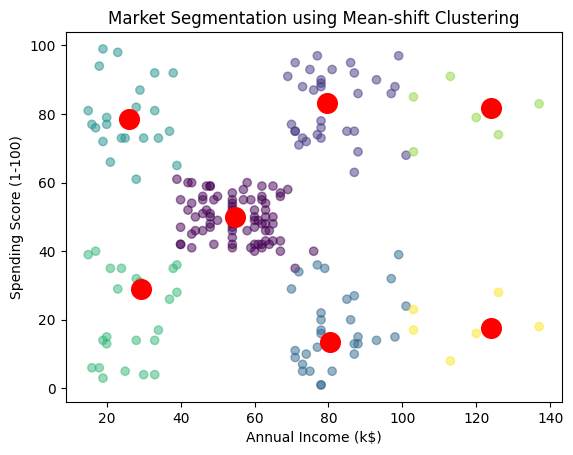

In [ ]:
# Create a MeanShift instance with bandwidth parameter
bandwidth = 20  # Adjust bandwidth as needed
meanshift = MeanShift(bandwidth=bandwidth)

# Fit the MeanShift model to the data
meanshift.fit(X)

# Get the cluster centroids and labels
centroids = meanshift.cluster_centers_
labels = meanshift.labels_

# Number of clusters
num_clusters = len(np.unique(labels))
print("Number of clusters:", num_clusters)

# Visualize the clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, color='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Market Segmentation using Mean-shift Clustering')
plt.show()

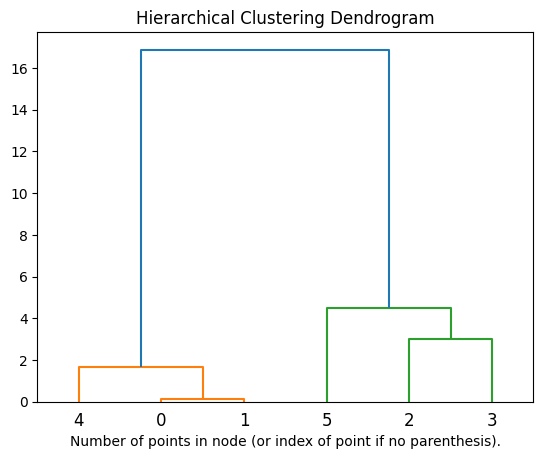

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Sample data
X = np.array([[1, 2], [1.1, 2.1], [5, 8],
              [8, 8], [1, 0.6], [9, 11]])

# Instantiate the clustering model
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')

# Fit model
model = model.fit(X)

# Function to plot the dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Plotting
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


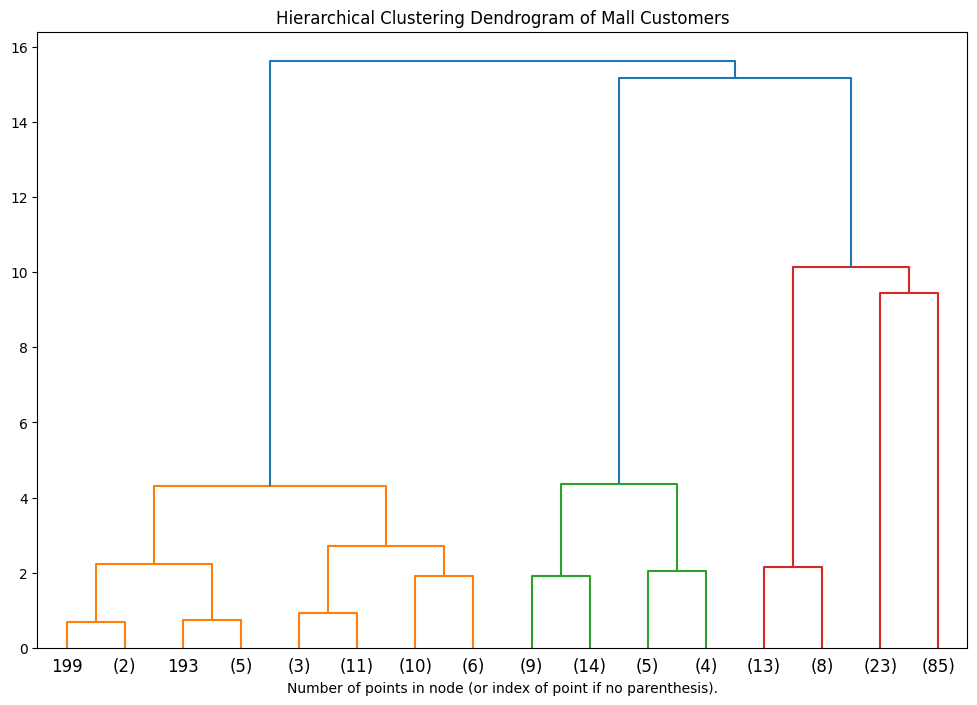

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the data
df = pd.read_csv('/content/drive/MyDrive/data/Mall_Customers.csv')

# Selecting the relevant features for clustering
# For this example, we use 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Agglomerative Clustering
# We won't specify n_clusters initially to get the full dendrogram
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model = model.fit(X_scaled)

# Function to plot the dendrogram
def plot_dendrogram(model, **kwargs):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Plotting
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram of Mall Customers')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


# Cluster Validation using Silhouette Analysis
Silhouette analysis measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Here's how to perform silhouette analysis after clustering:

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming 'model' and 'X_scaled' are from your previous Agglomerative Clustering
# Choose an appropriate number of clusters based on the dendrogram, e.g., 2, 3, or 5
model = AgglomerativeClustering(n_clusters=5)
labels = model.fit_predict(X_scaled)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print("For n_clusters =", 5, "The average silhouette_score is :", silhouette_avg)


For n_clusters = 5 The average silhouette_score is : 0.5538089226688662


For n_clusters = 2 The average silhouette_score is : 0.3842337621772661

For n_clusters = 3 The average silhouette_score is : 0.4610481446570447

For n_clusters = 4 The average silhouette_score is : 0.4925507715349343

**For n_clusters = 5 The average silhouette_score is : 0.5538089226688662**

For n_clusters = 6 The average silhouette_score is : 0.5386761871036926

For n_clusters = 8 The average silhouette_score is : 0.4308617778221774

# Further Analysis on Age and Gender
Once you have established the clusters, it's beneficial to examine these clusters concerning other variables like age and gender. Here's a way to do that:

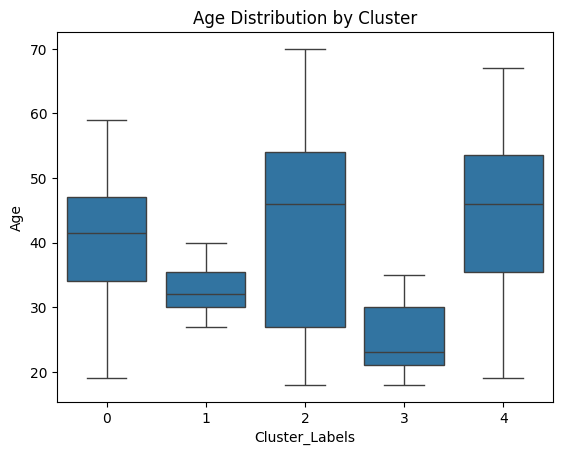

Genre           Female  Male
Cluster_Labels              
0                   14    18
1                   21    18
2                   51    34
3                   12     9
4                   14     9


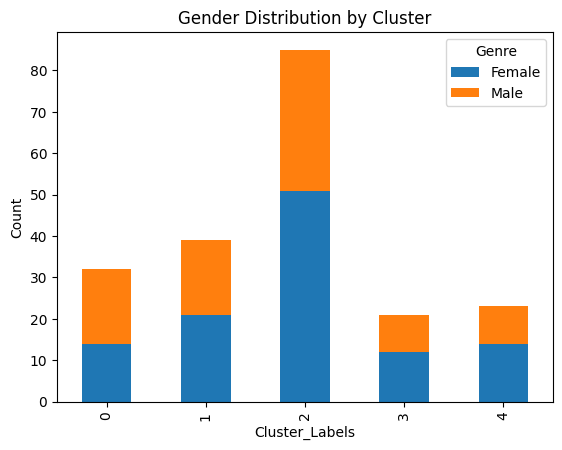

In [ ]:
# Add the cluster labels to your dataframe
df['Cluster_Labels'] = labels

# Analyze clusters by Age
import seaborn as sns
sns.boxplot(x='Cluster_Labels', y='Age', data=df)
plt.title('Age Distribution by Cluster')
plt.show()

# Analyze clusters by Gender
gender_cluster = pd.crosstab(df['Cluster_Labels'], df['Genre'])
print(gender_cluster)

# Visualize this data
gender_cluster.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Cluster')
plt.ylabel('Count')
plt.show()


# Age Distribution by Cluster

From the "Age Distribution by Cluster" boxplot:

- Cluster 0: Shows a wide age range from about 20 to 60 years, with a median around 45 years. This suggests a mixed-age cluster but generally skewed towards middle-aged customers.
- Cluster 1: This cluster has a very narrow age range centered around 25 years, indicating a predominantly young demographic.
- Cluster 2: Similar to cluster 0 but with a slightly higher median age, around 50 years. It represents older adults predominantly.
- Cluster 3: Shows a younger demographic similar to cluster 1 but with a slightly broader range, from about 20 to 40 years, median around 30 years.
- Cluster 4: Represents middle-aged customers, with a median age similar to clusters 0 and 2, but with a narrower interquartile range, suggesting less variability in the age of the customers in this cluster.

# Gender Distribution by Cluster

From the "Gender Distribution by Cluster" stacked bar chart:

- Cluster 0: Features a higher number of females than males, with a ratio leaning more towards female customers.
- Cluster 1: Contains a significantly higher proportion of males compared to females, suggesting this cluster is predominantly male.
- Cluster 2: Shows a balance between male and female customers, with a slight majority of female customers.
- Cluster 3: Similar to cluster 1, this cluster is dominated by males, showing a clear gender preference.
- Cluster 4: Has a slight female majority but is more balanced compared to clusters 0 and 1.

# Strategic Insights

- Marketing Strategies:

    + Clusters 0 and 2 (Older Adults): Focus on products and services that appeal to more mature adults. Marketing messages could emphasize quality and value, suitable for this demographic's lifestyle and preferences.
    + Clusters 1 and 3 (Young Males): These clusters could be targeted with more dynamic and trend-focused marketing campaigns, possibly emphasizing technology, fashion, or fast services.
    + Cluster 4 (Middle-aged Balanced): This cluster might respond well to a variety of offers, including family-oriented products and services or promotions that highlight balance and wellness.

- Product Placement and Store Layout:

    + Consider arranging stores or online interfaces to cater to the dominant gender in each cluster, perhaps by highlighting certain brands or products more likely to appeal to either males or females according to the cluster preferences.

- Customer Retention and Loyalty Programs:

    + Tailor loyalty programs to match the age-related interests and spending habits shown in each cluster. For example, offer loyalty rewards that appeal to the lifestyle and consumption patterns of young, middle-aged, and older adults accordingly.

By aligning your strategic initiatives with these insights, you can enhance customer satisfaction and potentially increase sales by catering more precisely to the needs and preferences of each customer segment.

# **Gaussian Mixture Model (GMM)**
A Gaussian Mixture Model (GMM) is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. It is used to model the data distribution and can serve as a tool for clustering analysis, density estimation, and as a generative model.

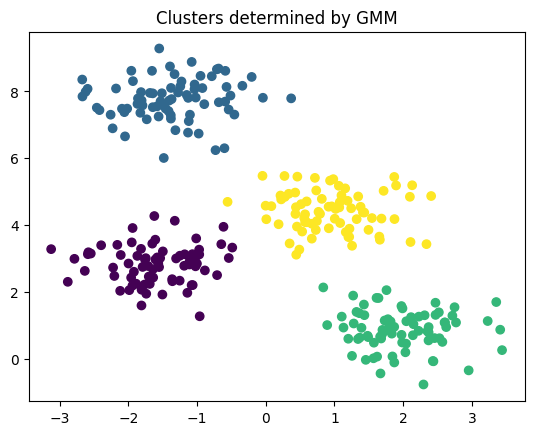

[[2.38140471e-03 8.04672295e-21 9.71688955e-01 2.59296402e-02]
 [2.34837535e-15 9.99999993e-01 7.13116691e-33 7.15846263e-09]
 [9.13480329e-09 2.04767765e-08 8.78022033e-12 9.99999970e-01]
 [3.38693314e-18 9.99999998e-01 7.76731322e-35 1.51487210e-09]
 [5.27089805e-06 1.38368754e-24 9.99174464e-01 8.20264795e-04]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate some data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Fit a Gaussian mixture with EM using 4 components
gmm = GaussianMixture(n_components=4, covariance_type='full')
gmm.fit(X)

# Predict the cluster for each data point
labels = gmm.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Clusters determined by GMM")
plt.show()

# Print the probabilities of each point to belong to each cluster
probs = gmm.predict_proba(X)
print(probs[:5])  # Print probabilities for the first 5 samples


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/MyDrive/data/Mall_Customers.csv')

# Let's say we focus on 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

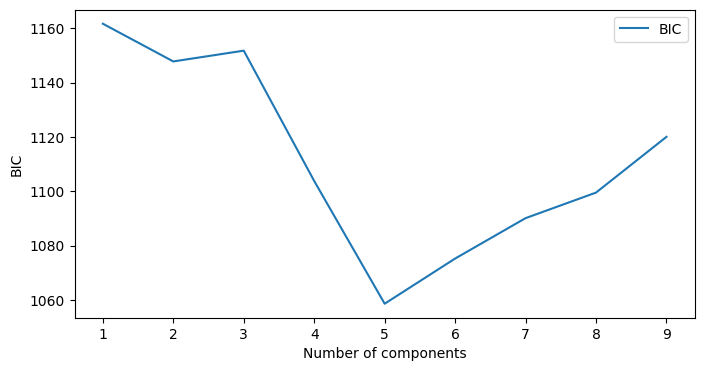

In [ ]:
# Fit a Gaussian mixture model
# Trying different numbers of components and select the best based on BIC
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_scaled) for n in n_components]
bic_values = [m.bic(X_scaled) for m in models]

# Plot the BIC scores
plt.figure(figsize=(8, 4))
plt.plot(n_components, bic_values, label='BIC')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.legend()
plt.show()

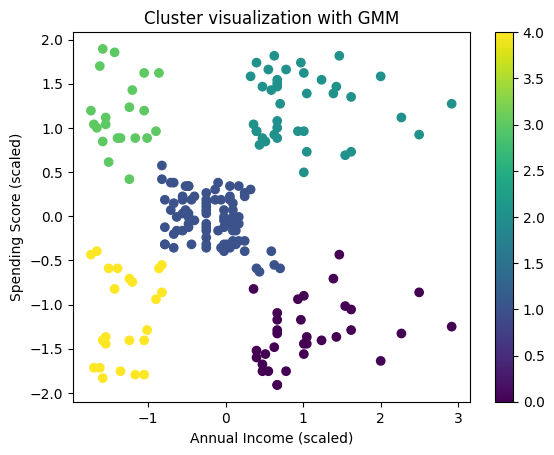

In [ ]:
# Assuming the optimal number of clusters from BIC is 4
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=0)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Cluster visualization with GMM')
plt.colorbar()
plt.show()

# Another Step further

# Extend the Demographic Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('/content/drive/MyDrive/data/Mall_Customers.csv')

# Preprocess Data
# Let's say we focus on 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Optional: Encode 'Gender' if it's needed for additional analysis
gender_encoder = LabelEncoder()
df['Genre'] = gender_encoder.fit_transform(df['Genre'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

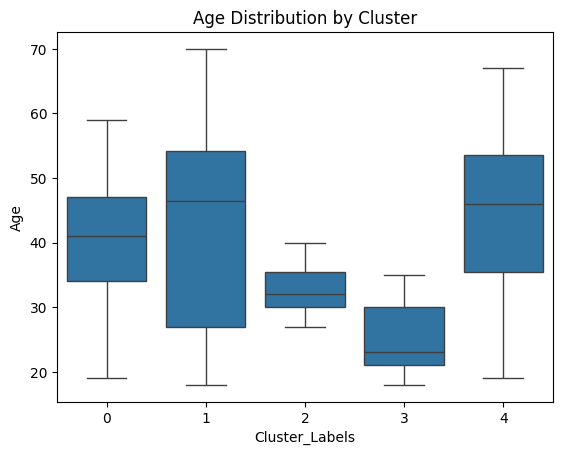

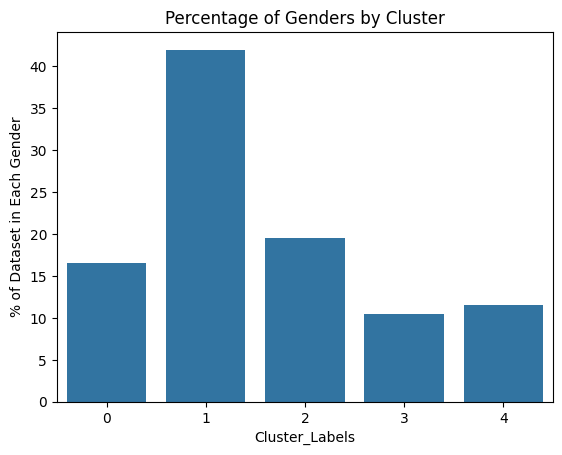

In [ ]:
# Apply GMM
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=0)
gmm.fit(X_scaled)
df['Cluster_Labels'] = gmm.predict(X_scaled)

# Demographic Analysis: Age and Gender Distribution by Cluster
sns.boxplot(x='Cluster_Labels', y='Age', data=df)
plt.title('Age Distribution by Cluster')
plt.show()

sns.barplot(x='Cluster_Labels', y='Genre', data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.title('Percentage of Genders by Cluster')
plt.ylabel('% of Dataset in Each Gender')
plt.show()

# Predictive Modeling Using Cluster Labels

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Labels
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,0


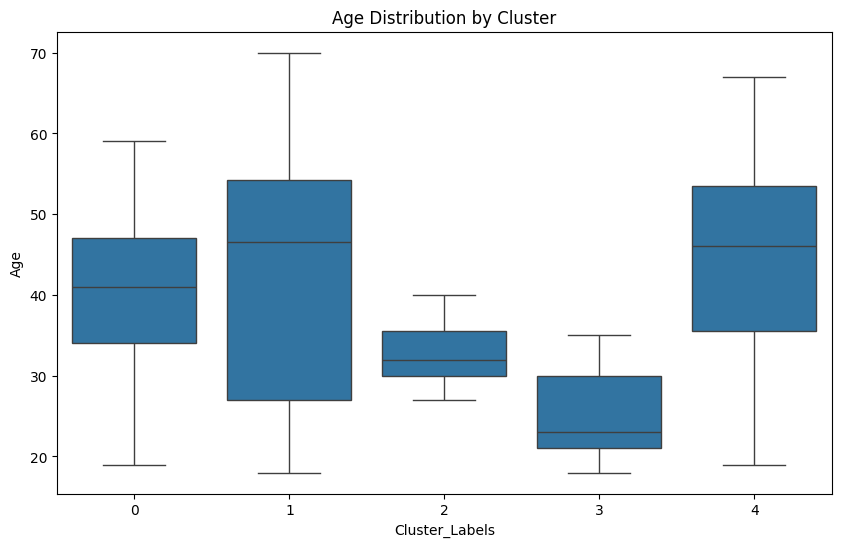

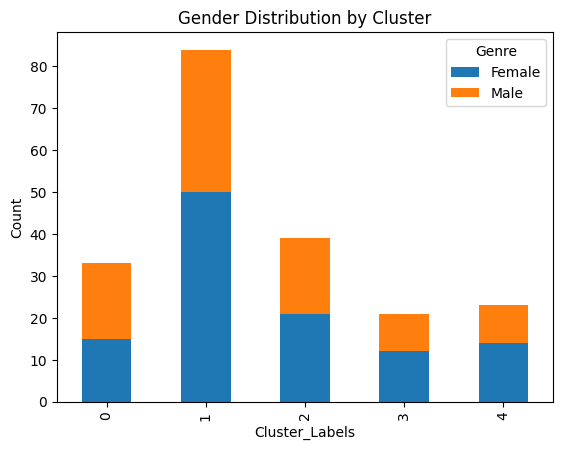

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.mixture import GaussianMixture

# Load the data
df = pd.read_csv('/content/drive/MyDrive/data/Mall_Customers.csv')

# Preprocessing
scaler = StandardScaler()
df['Annual Income (k$)_scaled'] = scaler.fit_transform(df[['Annual Income (k$)']])
df['Spending Score (1-100)_scaled'] = scaler.fit_transform(df[['Spending Score (1-100)']])
X_scaled = df[['Annual Income (k$)_scaled', 'Spending Score (1-100)_scaled']].values

# Apply GMM
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=0)
labels = gmm.fit_predict(X_scaled)
df['Cluster_Labels'] = labels

# Plot Age Distribution by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_Labels', y='Age', data=df)
plt.title('Age Distribution by Cluster')
plt.show()

# Plot Gender Distribution by Cluster
gender_counts = pd.crosstab(df['Cluster_Labels'], df['Genre'])
gender_counts.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Cluster')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create feature set excluding the cluster labels
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
labels = df['Cluster_Labels']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of predicting cluster labels: {accuracy:.2f}')


Accuracy of predicting cluster labels: 0.95


In [ ]:
import numpy as np
import random

# Environment parameters
grid_size = 4
states = grid_size * grid_size  # 16 states for a 4x4 grid
actions = 4  # up, down, left, right

# Initialize Q-values
q_values = np.zeros((states, actions))
# Define rewards for the grid
rewards = np.full((states, actions), -1.0)  # small penalty for non-terminal states
rewards[15, :] = 10  # reward for reaching the terminal state

In [ ]:
# Define the state transitions for a 4x4 grid
def next_state(state, action):
    row, col = divmod(state, grid_size)
    if action == 0 and row > 0:  # up
        state -= grid_size
    elif action == 1 and row < grid_size - 1:  # down
        state += grid_size
    elif action == 2 and col > 0:  # left
        state -= 1
    elif action == 3 and col < grid_size - 1:  # right
        state += 1
    return state

# Hyperparameters
alpha = 0.5  # learning rate
gamma = 0.9  # discount factor
epsilon = 0.1  # exploration rate

In [ ]:
# Epsilon-greedy policy
def policy(state):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, actions - 1)
    else:
        return np.argmax(q_values[state])

# Q-Learning algorithm
for _ in range(10000):
    state = random.randint(0, states - 1)  # start from a random state
    while state != 15:  # until reaching the terminal state
        action = policy(state)
        next_st = next_state(state, action)
        reward = rewards[state, action]
        # Update Q-values
        best_next_action = np.argmax(q_values[next_st])
        td_target = reward + gamma * q_values[next_st, best_next_action]
        td_delta = td_target - q_values[state, action]
        q_values[state, action] += alpha * td_delta
        state = next_st  # move to the next state

In [ ]:
# Display learned Q-values
print("Learned Q-values:")
print(q_values)

# Extract and print optimal policy
optimal_policy = [np.argmax(q_values[state]) for state in range(states)]
print("Optimal policy (0=up, 1=down, 2=left, 3=right):")
print(optimal_policy)

Learned Q-values:
[[-5.21703067 -4.68559    -5.21703095 -4.68559   ]
 [-4.68553367 -4.0951     -5.21702402 -4.0951    ]
 [-4.09509393 -3.439      -4.68558646 -3.439     ]
 [-3.43899978 -2.71       -4.0950618  -3.43897396]
 [-5.217031   -4.0951     -4.68559    -4.0951    ]
 [-4.68559    -3.439      -4.68559    -3.439     ]
 [-4.0951     -2.71       -4.0951     -2.71      ]
 [-3.439      -1.9        -3.439      -2.71      ]
 [-4.68559    -3.439      -4.0951     -3.439     ]
 [-4.0951     -2.71       -4.0951     -2.71      ]
 [-3.439      -1.9        -3.439      -1.9       ]
 [-2.71       -1.         -2.71       -1.9       ]
 [-4.0951     -3.439      -3.439      -2.71      ]
 [-3.439      -2.71       -3.439      -1.9       ]
 [-2.71       -1.9        -2.71       -1.        ]
 [ 0.          0.          0.          0.        ]]
Optimal policy (0=up, 1=down, 2=left, 3=right):
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 0]


# **R-Learning Methodology**

In [ ]:
!pip install yfinance numpy matplotlib

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical stock data for Tesla
data = yf.download('TSLA', start='2020-01-01', end='2024-05-10')
prices = data['Close'].values

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Compute daily returns as percentage changes
daily_returns = np.diff(prices) / prices[:-1]
# Discretize the returns into 5 bins (states)
bins = np.linspace(np.percentile(daily_returns, 5), np.percentile(daily_returns, 95), 4)
states = np.digitize(daily_returns, bins)

In [ ]:
# R-Learning algorithm implemntation
# Parameters
actions = 3  # 0=sell, 1=hold, 2=buy
alpha = 0.05  # Learning rate for Q-values
beta = 0.01  # Learning rate for average reward update
Q = np.zeros((5, actions))
rho = 0
portfolio = 0
holding = False

# Simulation
for t in range(1, len(states)):
    state = states[t-1]
    if np.random.rand() < 0.1:  # Exploration
        action = np.random.choice(actions)
    else:  # Exploitation
        action = np.argmax(Q[state])

    # Execute action
    if action == 2 and not holding:  # buy
        portfolio -= prices[t]
        holding = True
    elif action == 0 and holding:  # sell
        portfolio += prices[t]
        holding = False
    # Calculate reward
    reward = portfolio

    # Update state
    next_state = states[t]
    next_best_action = np.argmax(Q[next_state])
    td_error = reward - rho + Q[next_state, next_best_action] - Q[state, action]
    Q[state, action] += alpha * td_error
    rho += beta * td_error

# Output learned Q-values and estimated average reward
print("Learned Q-values:")
print(Q)
print("Estimated average reward:", rho)

Learned Q-values:
[[  43.66757269   -1.58324     -28.27823707]
 [  21.49541198   -1.13495132  -79.58825078]
 [  20.24432738   -2.86513492 -109.40605078]
 [  29.28196573    2.10096432  -43.14301604]
 [  -1.19972792   35.36868714  -23.32662106]]
Estimated average reward: -27.67326012540478


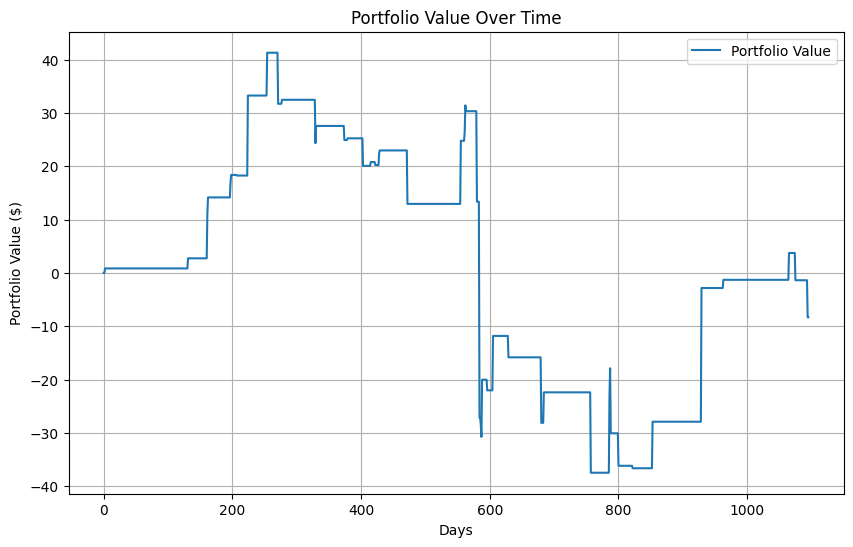

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize portfolio value tracking
portfolio_values = []

# Assuming you have variables and setup as previously described
n_days = len(prices) - 1  # Adjusted for the daily_returns calculation
portfolio = 0
holding = False
portfolio_values.append(portfolio)

for t in range(n_days):
    state = states[t]
    if np.random.rand() < 0.1:  # Exploration
        action = np.random.choice(actions)
    else:  # Exploitation
        action = np.argmax(Q[state])

    # Execute action
    if action == 2 and not holding:  # buy
        portfolio -= prices[t]
        holding = True
    elif action == 0 and holding:  # sell
        portfolio += prices[t]
        holding = False

    # Update portfolio value for the day
    if holding:
        current_value = portfolio + prices[t]  # Include current price if holding stock
    else:
        current_value = portfolio

    portfolio_values.append(current_value)

# Plotting portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(range(n_days + 1), portfolio_values, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

# Analysis of Portfolio Performance
 1 - Variability in Portfolio Value: The plot displays significant ups and downs in the portfolio value. This indicates that the trading strategy had periods of both profit and loss. The strategy's performance seems volatile, with some sharp increases and decreases, suggesting that the trading decisions made by the model may be highly reactive to the state transitions defined by daily price changes.

 2 - Major Shifts: Notable are the large drops and subsequent recoveries, particularly around the 600-day mark and again near the 800-day mark. These could correspond to periods of high market volatility, which the model might either be exploiting successfully or getting adversely impacted by.

 3 - End Performance: By the end of the period, the portfolio shows a gain from the initial value (assuming it started around 0). This is a positive outcome, but the path to this point was quite erratic, which might not be acceptable for all types of investors, especially those with a low tolerance for risk.

# Next Steps
Given the observed performance and the identified areas for improvement, the next steps involve iterating on the model's design, refining the trading strategy, and conducting extensive backtesting. This iterative process is crucial to developing a reliable automated trading system.

# Step 1: Incorporating Technical Indicators
We'll add two common technical indicators: the Relative Strength Index (RSI) and a simple moving average (SMA) to enhance the state definitions.

In [ ]:
# Normalize indicators
data['SMA_pct_change'] = data['SMA'].pct_change()
data['RSI_scaled'] = (data['RSI'] - 50) / 50  # Scale RSI to [-1, 1] range around the midpoint 50
data = data.dropna()

# Quantize indicators into discrete states
data['SMA_state'] = pd.qcut(data['SMA_pct_change'], 4, labels=False, duplicates='drop')
data['RSI_state'] = pd.qcut(data['RSI_scaled'], 4, labels=False, duplicates='drop')

# Combine states into a single state variable
states = data['SMA_state'] * 5 + data['RSI_state']  # Assume 5 bins for each
n_states = states.nunique()
actions = 3  # 0=sell, 1=hold, 2=buy
Q = np.zeros((n_states, actions))
rho = 0
alpha = 0.05
beta = 0.01
epsilon = 0.1  # Initial exploration rate

<ipython-input-76-7d4f05df9715>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_state'] = pd.qcut(data['SMA_pct_change'], 4, labels=False, duplicates='drop')
<ipython-input-76-7d4f05df9715>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI_state'] = pd.qcut(data['RSI_scaled'], 4, labels=False, duplicates='drop')


# **UNH**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

def compute_rsi(data, window=14):
    diff = data.diff(1).dropna()
    gain = (diff > 0) * diff
    loss = (diff < 0) * -diff
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [ ]:
# Fetch data
data = yf.download('UNH', start='2020-01-01', end='2024-01-01')
data['Returns'] = data['Close'].pct_change()
data['SMA'] = data['Close'].rolling(window=20).mean()
data['RSI'] = compute_rsi(data['Close'], window=14)
data.dropna(inplace=True)

# Normalize and discretize indicators
data['SMA_pct_change'] = data['SMA'].pct_change()
data['RSI_scaled'] = (data['RSI'] - 50) / 50  # Scale RSI to [-1, 1] range around the midpoint 50
data.dropna(inplace=True)

data['SMA_state'] = pd.qcut(data['SMA_pct_change'], 4, labels=False, duplicates='drop')
data['RSI_state'] = pd.qcut(data['RSI_scaled'], 4, labels=False, duplicates='drop')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Create combined state and check for indexing issues
data['Combined_state'] = data['SMA_state'] * 5 + data['RSI_state']
n_states = data['Combined_state'].max() + 1  # Adjusted to fit the actual max index
actions = 3  # 0=sell, 1=hold, 2=buy
Q = np.zeros((n_states, actions))
rho = 0
alpha = 0.05
beta = 0.01
epsilon = 0.1

portfolio = 0
holding = False
portfolio_values = []

In [ ]:
def simulate_trade(action, price, portfolio, holding):
    """
    Simulates the trading action.

    Parameters:
        action (int): The trading action to take (0 = sell, 1 = hold, 2 = buy).
        price (float): The current price of the stock.
        portfolio (float): The current value of the portfolio.
        holding (bool): A flag indicating whether the stock is currently held.

    Returns:
        float: The updated portfolio value.
        bool: Updated holding status.
    """
    if action == 2 and not holding:  # buy
        portfolio -= price  # subtract the price from portfolio to simulate buying
        holding = True
    elif action == 0 and holding:  # sell
        portfolio += price  # add the price to the portfolio to simulate selling
        holding = False
    # if holding, update the portfolio to reflect the current market value
    return portfolio, holding


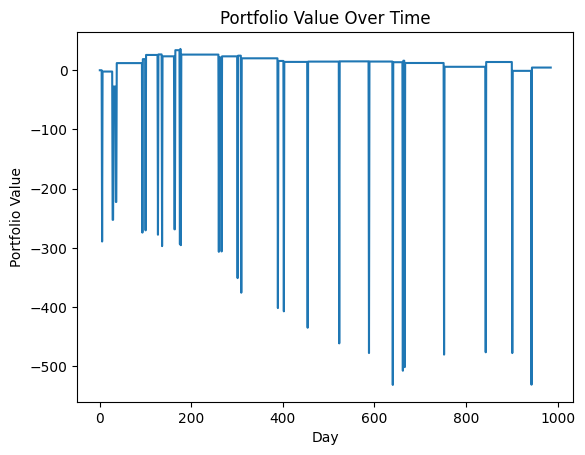

In [ ]:
# Assuming other parts of your code have been set up correctly
portfolio = 0
holding = False
portfolio_values = []

for i, (idx, row) in enumerate(data.iterrows()):
    state = states[idx]
    action = np.random.choice(actions) if np.random.rand() < epsilon else np.argmax(Q[state])
    price = row['Close']

    # Simulate trading based on the chosen action
    portfolio, holding = simulate_trade(action, price, portfolio, holding)

    # Assume next state is the following day's state or the same if it's the last record
    next_state = states.iloc[(i + 1) % len(states)]

    # Calculate reward as the change in portfolio value
    reward = portfolio  # Here we're simplifying reward to just be the portfolio value

    # Update Q-values and rho
    next_best_action = np.argmax(Q[next_state])
    td_error = reward - rho + Q[next_state, next_best_action] - Q[state, action]
    Q[state, action] += alpha * td_error
    rho += beta * td_error

    # Optionally decay epsilon
    epsilon *= 0.9995

    # Track portfolio value for plotting
    portfolio_values.append(portfolio)

# Plot portfolio values over time to visualize performance
plt.plot(portfolio_values)
plt.xlabel('Day')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()


# **Gradient Boosting Machine (GBM) methodology**

In [ ]:
!pip install numpy pandas scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/data/Mall_Customers.csv')

# Assume we want to classify customers based on their Spending Score into 'Low', 'Medium', 'High'
data['Spending Score (1-100)'] = pd.qcut(data['Spending Score (1-100)'], 3, labels=["Low", "Medium", "High"])

# Encode categorical data
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])

# Define features and target
X = data[['Genre', 'Age', 'Annual Income (k$)']]
y = data['Spending Score (1-100)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions
predictions = gbm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        High       0.69      0.73      0.71        15
         Low       0.73      0.70      0.71        23
      Medium       0.86      0.86      0.86        22

    accuracy                           0.77        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60



# Interpretation of Classification Metrics:
1- Precision: Indicates the accuracy of positive predictions. For example, 69% of customers predicted as 'High' spending are correctly classified. This tells you how trustworthy the model's prediction is when it predicts a class.

 - High: 69% precision means that out of all customers predicted as high spenders, 69% were actually high spenders.
 - Low: 73% precision means that 73% of all customers predicted as low spenders were actually low spenders.
 - Medium: 86% precision, the highest among the three, suggests strong accuracy in predictions of medium spenders.

2- Recall (Sensitivity): Measures the ability of the model to find all the actual positives. For instance, 73% recall in 'High' means the model correctly identifies 73% of all actual high spenders.

 - High: 73% recall implies the model identified 73% of the actual high spenders.
 - Low: 70% recall indicates it caught 70% of the actual low spenders.
Medium: Also 86%, indicating a high capability of the model to detect medium spenders.

3- F1-Score: Combines precision and recall into a single measure that captures both properties. An F1 score is particularly useful when the distribution of class categories is uneven.

 - High: F1-score of 0.71 suggests a good balance between recall and precision.
 - Low: Also a F1-score of 0.71.
 - Medium: The F1-score of 0.86 highlights excellent model performance for medium spenders.

4- Support: The actual number of occurrences of the class in the specified dataset. For example, there were 15 actual high spenders, 23 low spenders, and 22 medium spenders in your test set.

# Summary:
 - Accuracy: Overall, the model correctly predicts the spending score category 77% of the time. This is a decent performance but suggests there is room for improvement, especially in distinguishing between high and low spenders.

 - Macro Average: Averages the unweighted mean per label, giving equal weight to all classes, which is useful if you suspect there might be class imbalance. The macro average F1-score is 0.76, which suggests relatively balanced performance across the classes despite any potential imbalances in the number of examples for each class.

 - Weighted Average: Averages the support-weighted mean per label, which is preferable when classes are imbalanced. The weighted average F1-score being 0.77, similar to the overall accuracy, indicates a solid performance weighted according to the prevalence of each class.

# **Step-by-Step Implementation Using XGBoost for the Mall_Customers Dataset**
# Step 1: Install XGBoost
If you haven't already installed XGBoost, you can do so using pip. Run this command in your terminal:

In [ ]:
!pip install xgboost

# Step 2: Import Libraries and Load Data
Here's how to set up your environment and load the data:

In [ ]:
data.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,Low
1,2,1,21,15,High


In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/data/Mall_Customers.csv')

# Assuming we are using the following columns and preparing the target as categorical
data['Spending Score (1-100)'] = pd.qcut(data['Spending Score (1-100)'], 3, labels=["Low", "Medium", "High"])
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])

X = data[['Genre', 'Age', 'Annual Income (k$)']]
y = label_encoder.fit_transform(data['Spending Score (1-100)'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Step 3: Configure and Train XGBoost
Configure the XGBoost classifier and train it on the data:

In [ ]:
# Create an instance of the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='mlogloss'  # to avoid warning since XGBoost expects you to handle it
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the Model
Assess the model's performance using classification report:

In [ ]:
# Print classification report
print(classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

              precision    recall  f1-score   support

         Low       0.76      0.87      0.81        15
      Medium       0.89      0.74      0.81        23
        High       0.88      0.95      0.91        22

    accuracy                           0.85        60
   macro avg       0.84      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

